### Analytics of retailer data
- Exploratroy data analysis : data insights
- Exploring whether holiday affects the sale
- Forecasting the sales for a specific period of time

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Loading the dataset
df_stores = pd.read_csv('./retaildataset/stores data-set.csv')
df_features = pd.read_csv('./retaildataset/Features data set.csv', parse_dates = ['Date'])
df_sales = pd.read_csv('./retaildataset/sales data-set.csv', parse_dates = ['Date'])

In [4]:
# Cleaning and processing the data

In [8]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [10]:
df_sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [7]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
print(df_features.shape)
df_features.isna().sum()

(8190, 12)


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

<AxesSubplot:>

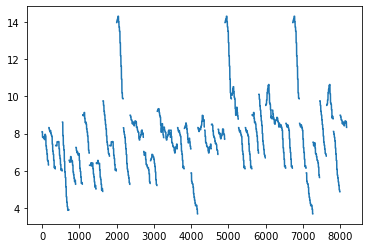

In [13]:
df_features.Unemployment.plot()

<AxesSubplot:>

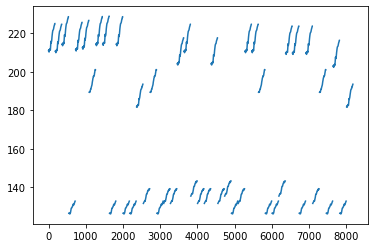

In [14]:
df_features.CPI.plot()

<AxesSubplot:>

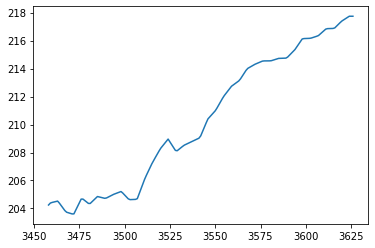

In [15]:
df_features[df_features.Store == 20].CPI.plot()

Not wise to impute in missing values for the markdown columns as they have a lot of missing values. Considering only about 5% of CPI and Unemployment values are missing, we can look to impute in the missing values.

In [17]:
# Filling the missing value
for i in range(1,46):
    df_features[df_features.Store == i]= df_features[df_features.Store == i].interpolate()

<AxesSubplot:>

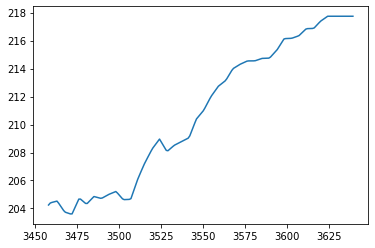

In [18]:
# Plotting after filling the missing value
df_features[df_features.Store == 20].CPI.plot()

In [19]:
# checking the NaN value again
df_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4140
MarkDown2       4140
MarkDown3       4143
MarkDown4       4188
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

In [20]:
# Filling the NaN value with zero for MarkDown columns
df_features[df_features.columns[4:9]] = df_features[df_features.columns[4:9]].fillna(0)

df_features.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [65]:
# Printing the data duration 
df_sales.Date.max()
df_features.Date.max()

Timestamp('2013-12-07 00:00:00')

In [60]:
print(df_features.Date.min())
print(df_features.Date.max())

2010-01-10 00:00:00
2013-12-07 00:00:00


### Merging the dataframes

Merging features and sales on column columns (Date, Store and IsHoliday) coupled with a right join on sales. This is because sales has data till 2012 but features has data till 2013 so let's train our model on the data till 2012 and forecast the 2013 data.

In [21]:
df_all_1 = df_features.merge(df_sales, 'right', on = ['Date', 'Store', 'IsHoliday'])

df_all_1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50
1,1,2010-05-02,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27
2,1,2010-05-02,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12
3,1,2010-05-02,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04
4,1,2010-05-02,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


In [22]:
# Merging Sales + features with store 
df_all = df_all_1.merge(df_stores, 'left', on = 'Store')
df_all.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [23]:
# Sorting the value by date
df_all = df_all.sort_values('Date')

In [24]:
# Reseting index
df_all.reset_index(inplace = True)

In [26]:
# droping the index column
df_all.drop(['index'], axis = 1, inplace = True)

df_all.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,13,2010-01-10,68.74,2.853,0.0,0.0,0.0,0.0,0.0,126.234600,7.795,False,14,20922.18,A,219622
1,40,2010-01-10,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,False,74,9872.41,A,155083
2,40,2010-01-10,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,False,79,10840.77,A,155083
3,27,2010-01-10,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,False,98,9837.86,A,204184
4,27,2010-01-10,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,False,97,19095.76,A,204184


In [27]:
# Basic statistical summary of the quantitive features
df_all.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.392585,913.428550,468.814001,1086.569677,1662.772385,171.201947,7.960289,44.260317,15981.258123,136727.915739
std,12.785297,18.447931,0.458515,6052.257540,5086.843826,5528.817592,3894.194587,4207.629321,39.159276,1.863296,30.492054,22711.183519,60980.583328
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,-4988.940000,34875.000000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2079.650000,93638.000000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,37.000000,7612.030000,140167.000000
75%,33.000000,74.280000,3.738000,2809.050000,39.560000,6.500000,436.670000,2168.040000,212.416993,8.572000,74.000000,20205.852500,202505.000000
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000,219622.000000


In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     421570 non-null  float64       
 5   MarkDown2     421570 non-null  float64       
 6   MarkDown3     421570 non-null  float64       
 7   MarkDown4     421570 non-null  float64       
 8   MarkDown5     421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Dept          421570 non-null  int64         
 13  Weekly_Sales  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [29]:
# Mapping IsHoliday and Type feature from boolean and object to numberic 

mapping_dict = {'IsHoliday':{True:1, False:0}}
df_all.replace(mapping_dict, inplace=True)

mapping_dict_1 = {'Type':{'A':3, 'B':2, 'C':1}}
df_all.replace(mapping_dict_1, inplace=True)

In [30]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     421570 non-null  float64       
 5   MarkDown2     421570 non-null  float64       
 6   MarkDown3     421570 non-null  float64       
 7   MarkDown4     421570 non-null  float64       
 8   MarkDown5     421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  int64         
 12  Dept          421570 non-null  int64         
 13  Weekly_Sales  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

In [31]:
df_all.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,13,2010-01-10,68.74,2.853,0.0,0.0,0.0,0.0,0.0,126.234600,7.795,0,14,20922.18,3,219622
1,40,2010-01-10,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,0,74,9872.41,3,155083
2,40,2010-01-10,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,0,79,10840.77,3,155083
3,27,2010-01-10,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,0,98,9837.86,3,204184
4,27,2010-01-10,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,0,97,19095.76,3,204184


## Exploratory Data Analysis (EDA)

In [32]:
# Setting up for time series analysis
df_by_date = df_all.groupby('Date', as_index=False).agg({'Temperature': 'mean',
                                                        'Fuel_Price': 'mean',
                                                        'CPI': 'mean',
                                                        'Unemployment': 'mean', 
                                                        'Weekly_Sales': 'sum',
                                                        'IsHoliday': 'mean'})

In [33]:
df_by_date.Date = pd.to_datetime(df_by_date.Date, errors='coerce')
df_by_date.set_index('Date', inplace=True)

df_by_date.head()

,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday
Date,,,,,,
2010-01-10,69.386998,2.733064,168.004935,8.433960,42239875.87,0
2010-02-04,52.587887,2.825453,167.377836,8.441092,50423831.26,0
2010-02-07,76.555955,2.793190,167.663264,8.373801,48917484.50,0
2010-02-19,37.038310,2.673666,167.338966,8.576351,48276993.78,0
2010-02-26,38.629563,2.685642,167.691019,8.561375,43968571.13,0


In [34]:
# resampling (weekly, backfill) with some dummy dates in the middle 
# as the above data doesn't have a definitive frequency

df_by_date_new = df_by_date.resample('W').mean().fillna(method='bfill')

df_by_date_new[0:10]

,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday
Date,,,,,,
2010-01-10,69.386998,2.733064,168.004935,8.433960,4.223988e+07,0.0
2010-01-17,64.571921,2.809321,167.520550,8.407446,4.967066e+07,0.0
2010-01-24,64.571921,2.809321,167.520550,8.407446,4.967066e+07,0.0
2010-01-31,64.571921,2.809321,167.520550,8.407446,4.967066e+07,0.0
2010-02-07,64.571921,2.809321,167.520550,8.407446,4.967066e+07,0.0
2010-02-14,37.038310,2.673666,167.338966,8.576351,4.827699e+07,0.0
2010-02-21,37.038310,2.673666,167.338966,8.576351,4.827699e+07,0.0
2010-02-28,38.629563,2.685642,167.691019,8.561375,4.396857e+07,0.0
2010-03-07,58.629843,2.816753,167.988959,8.405245,4.855164e+07,0.0


In [69]:
df_by_date_new.index.max()

Timestamp('2012-12-16 00:00:00', freq='W-SUN')

### Decomposing for time series analysis (trend and season)

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

Seasonal Decompose gives the decomposition of the time series into its estimated trend component, estimated seasonal component, and estimated residual. We can also plot the original data to look at what components of the data influence its true value the most.

<AxesSubplot:title={'center':'residual'}, xlabel='Date'>

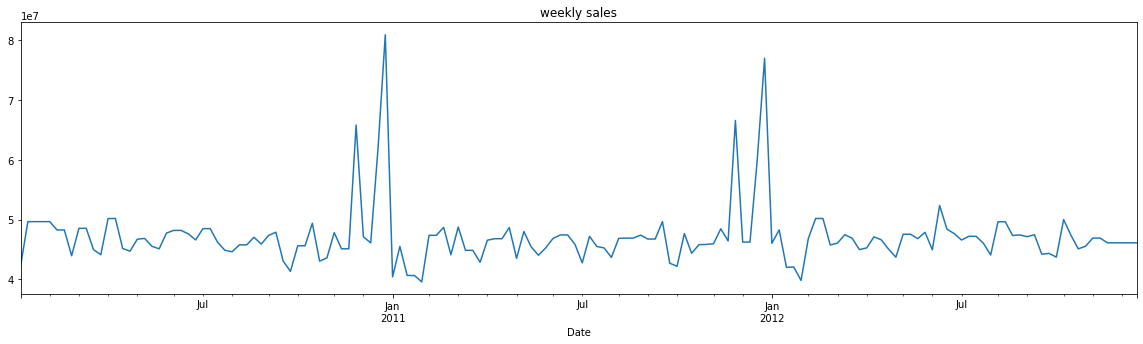

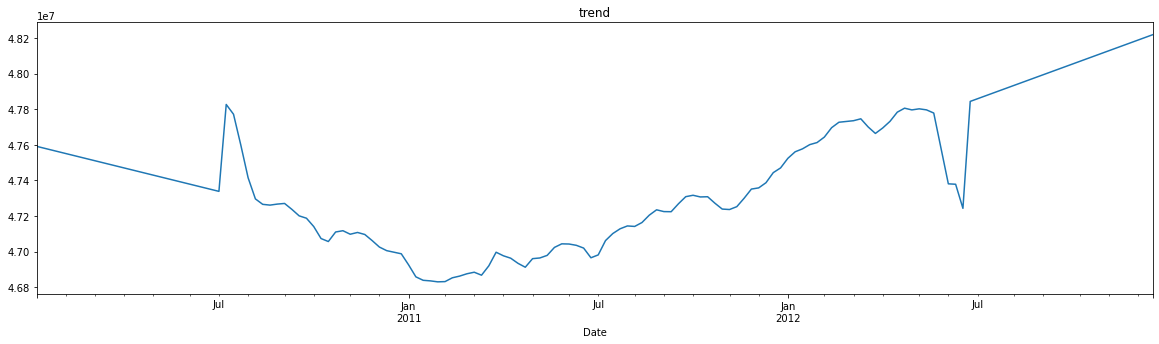

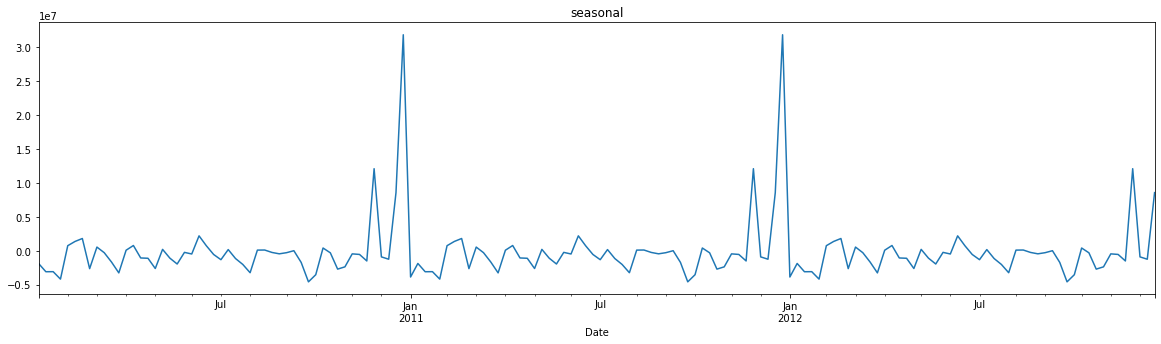

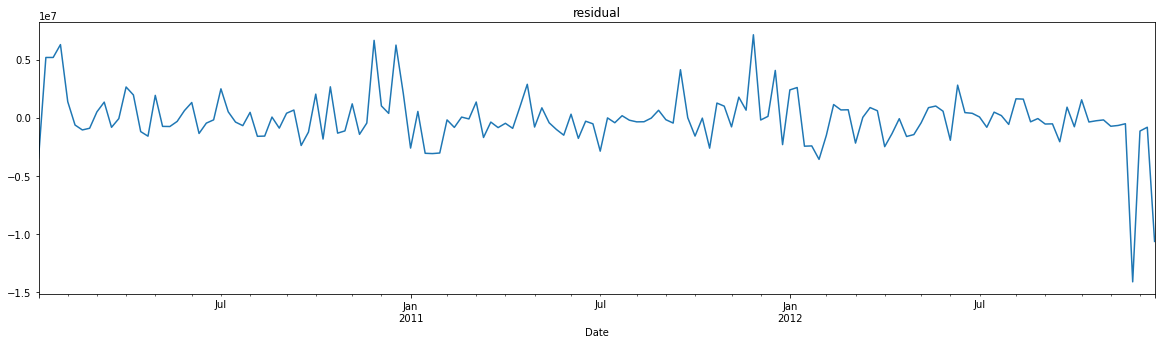

In [36]:
multi_plot = seasonal_decompose(df_by_date_new['Weekly_Sales'], model = 'add', extrapolate_trend='freq')

plt.figure(figsize=(20,5))
multi_plot.observed.plot(title = 'weekly sales')

plt.figure(figsize=(20,5))
multi_plot.trend.plot(title = 'trend')

plt.figure(figsize=(20,5))
multi_plot.seasonal.plot(title = 'seasonal')

plt.figure(figsize=(20,5))
multi_plot.resid.plot(title = 'residual')

In [37]:
# As it can be observed, the series is strongly influenced by the seasonal component

### Correlations

<AxesSubplot:>

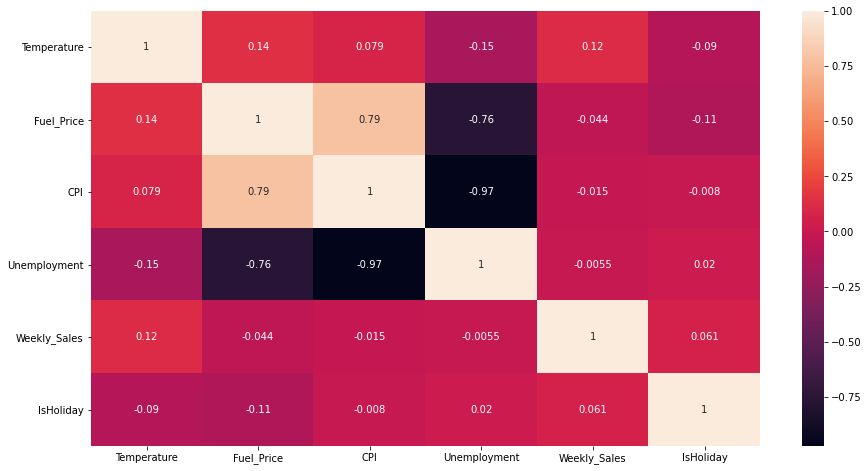

In [38]:
# Finding the correlations among the varibles 
plt.figure(figsize=(15,8))
sns.heatmap(df_by_date_new.corr('spearman'), annot = True)

strong +ve correlation b/w Fuel_Price and CPI and strong -ve correlations b/w Unmeployment and Fuel_Price and Unemployment and CPI. surprisingly, unemployment rate doesn't really seem to affect the weekly sales (directly at least)

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

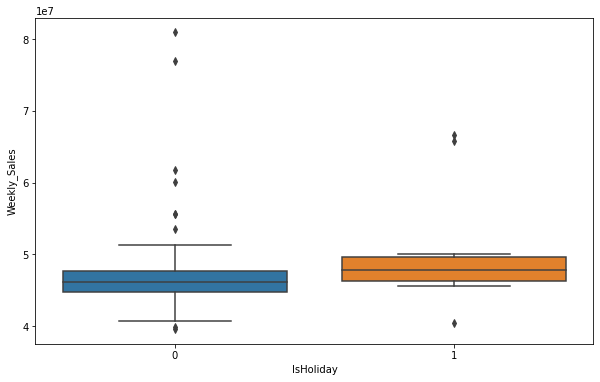

In [54]:
# plotting the sales in holiday weeks
plt.figure(figsize=(10,6))
sns.boxplot(data = df_by_date, x = 'IsHoliday', y = 'Weekly_Sales')

holiday weeks don't necessarily mean that the weekly sales go up but it is often the case

In [41]:
# Analysis by store 

df_by_store = df_all.groupby('Store').agg({'Temperature': 'mean',
                                           'Fuel_Price': 'mean',
                                           'CPI': 'mean',
                                           'Unemployment': 'mean', 
                                           'Weekly_Sales': 'sum',
                                           'IsHoliday': 'mean',
                                           'Type': 'max'})

df_by_store.describe()

,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday,Type
count,45.000000,45.000000,45.000000,45.000000,4.500000e+01,45.000000,45.000000
mean,60.620223,3.360718,171.595976,7.995321,1.497160e+08,0.070326,2.355556
std,9.806327,0.150153,39.664650,1.786202,7.816756e+07,0.000439,0.712089
min,39.602815,3.210664,128.663519,4.793244,3.716022e+07,0.069248,1.000000
25%,53.291597,3.220912,135.087130,7.004905,7.956575e+07,0.070050,2.000000
50%,58.413297,3.288495,186.287850,7.860290,1.382498e+08,0.070376,2.000000
75%,69.639935,3.443894,214.872865,8.585175,1.996139e+08,0.070598,3.000000
max,76.798159,3.617363,219.683641,13.116094,3.013978e+08,0.071270,3.000000


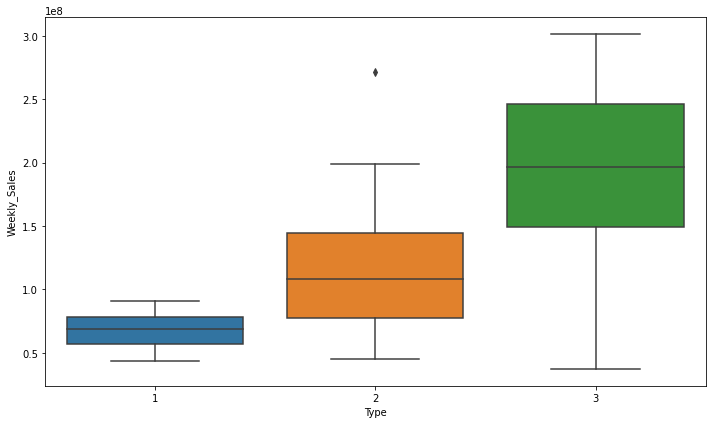

In [55]:
# plotting weekly_sales by store type 

plt.figure(figsize=(10,6))
sns.boxplot(data = df_by_store, x = 'Type', y = 'Weekly_Sales')
plt.tight_layout()

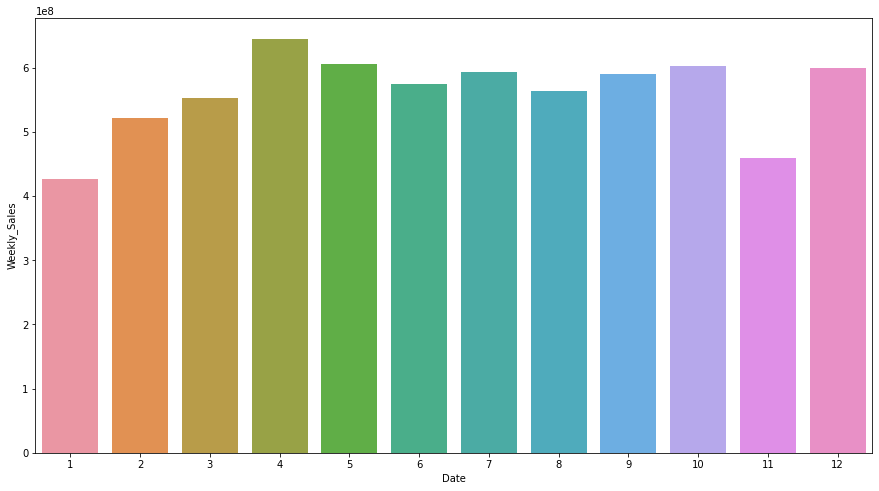

In [44]:
# Net monthly sales

monthly_sales = df_all.groupby(df_all.Date.dt.month).agg({'Weekly_Sales':'sum'})
plt.figure(figsize = (15,8))
sns.barplot(x = monthly_sales.index, y = monthly_sales.Weekly_Sales)
plt.show()

In [45]:
# Analysis by department
df_by_dept = df_all.groupby('Dept', as_index=False).agg({'Weekly_Sales':'sum'})
df_by_dept

,Dept,Weekly_Sales
0,1,1.236388e+08
1,2,2.806112e+08
2,3,7.589245e+07
3,4,1.671467e+08
4,5,1.356074e+08
...,...,...
76,95,4.493202e+08
77,96,7.383392e+07
78,97,8.949651e+07
79,98,3.982892e+07


In [46]:
# Sorting weekly sales by department to see the top departemnt 

df_by_dept.sort_values(by = 'Weekly_Sales', ascending = False, inplace = True)

df_by_dept.reset_index(drop=True, inplace=True)

df_by_dept


,Dept,Weekly_Sales
0,92,4.839433e+08
1,95,4.493202e+08
2,38,3.931181e+08
3,72,3.057252e+08
4,90,2.910685e+08
...,...,...
76,51,3.057283e+04
77,78,1.714710e+03
78,39,1.779800e+02
79,43,1.432000e+01


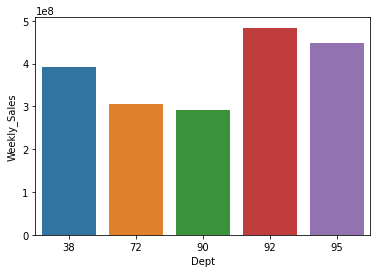

In [47]:
# Plotting top 5 departemnt 

sns.barplot(y='Weekly_Sales', x='Dept', data=df_by_dept[:5]);

## Forecasting using the Holt-Winter model

Exponential smoothing is a technique for smoothening time series data by giving different weights which are exponentially decreasing over time, unlike simple moving average method which assigns equal weightage to all observations. Holt Winters exponential smoothening applies exponential smoothing three times, usually done when high frequency signal has to be removed.

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [49]:
# Fit the model
# Train and test the model on 2012 year data 
fit_model = ExponentialSmoothing(df_by_date_new['Weekly_Sales'][:120],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

# predict the data
prediction = fit_model.forecast(34)
prediction

C:\Users\Rabbil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Rabbil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


2012-04-29    4.408942e+07
2012-05-06    4.817760e+07
2012-05-13    4.566087e+07
2012-05-20    4.433041e+07
2012-05-27    4.572858e+07
2012-06-03    4.722452e+07
2012-06-10    4.775316e+07
2012-06-17    4.767476e+07
2012-06-24    4.613555e+07
2012-07-01    4.355716e+07
2012-07-08    4.767521e+07
2012-07-15    4.591669e+07
2012-07-22    4.553187e+07
2012-07-29    4.402422e+07
2012-08-05    4.698084e+07
2012-08-12    4.693513e+07
2012-08-19    4.699070e+07
2012-08-26    4.727584e+07
2012-09-02    4.675870e+07
2012-09-09    4.680289e+07
2012-09-16    4.888037e+07
2012-09-23    4.221776e+07
2012-09-30    4.214340e+07
2012-10-07    4.712165e+07
2012-10-14    4.449558e+07
2012-10-21    4.524869e+07
2012-10-28    4.520996e+07
2012-11-04    4.567486e+07
2012-11-11    4.764565e+07
2012-11-18    4.568688e+07
2012-11-25    6.583377e+07
2012-12-02    4.562485e+07
2012-12-09    4.553103e+07
2012-12-16    5.954812e+07
Freq: W-SUN, dtype: float64

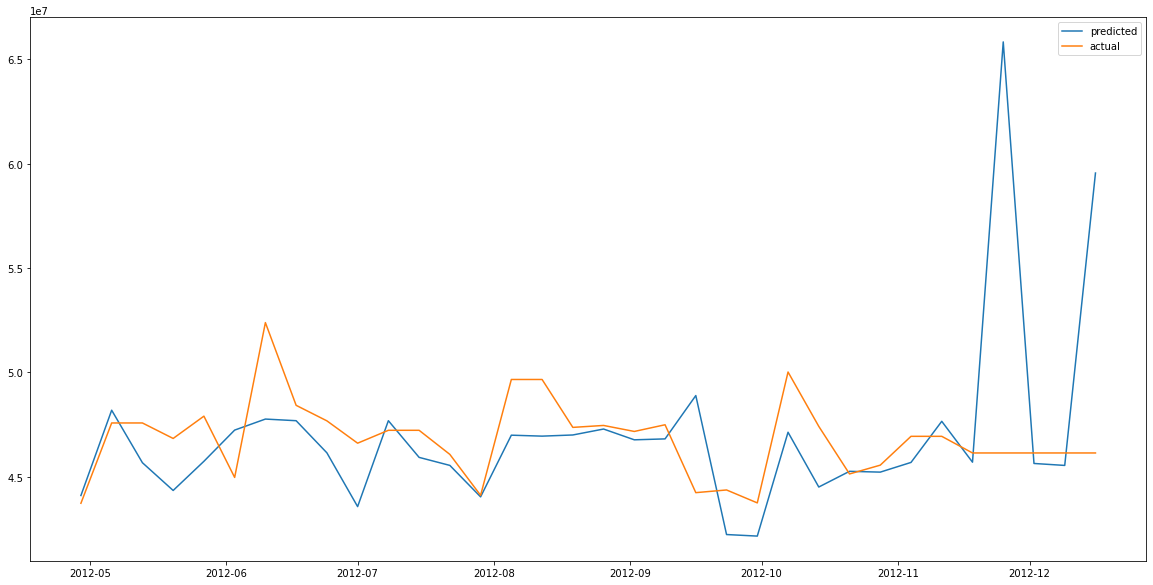

In [50]:
# plotting the actual vs predictions
plt.figure(figsize=(20,10))
plt.plot(df_by_date_new.index[120:], prediction, label = 'predicted')
plt.plot(df_by_date_new.index[120:], df_by_date_new.Weekly_Sales[120:], label = 'actual')
plt.legend()

In [51]:
# printing the model accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Mean Absolute Percentage Error = {a}%".format(a=mean_absolute_percentage_error(df_by_date_new.Weekly_Sales[120:],prediction)))

Mean Absolute Percentage Error = 5.049223519524804%


## Forecasting on 2013 sales data

In [67]:
fit_model = ExponentialSmoothing(df_by_date_new['Weekly_Sales'][:-2],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

future_prediction = fit_model.forecast(56)
future_prediction

C:\Users\Rabbil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


2012-12-09    4.534679e+07
2012-12-16    5.961971e+07
2012-12-23    7.710915e+07
2012-12-30    4.390688e+07
2013-01-06    4.645471e+07
2013-01-13    4.113835e+07
2013-01-20    4.125951e+07
2013-01-27    3.945413e+07
2013-02-03    4.633575e+07
2013-02-10    4.881627e+07
2013-02-17    4.898937e+07
2013-02-24    4.448937e+07
2013-03-03    4.581386e+07
2013-03-10    4.622648e+07
2013-03-17    4.554279e+07
2013-03-24    4.362269e+07
2013-03-31    4.483996e+07
2013-04-07    4.637862e+07
2013-04-14    4.574506e+07
2013-04-21    4.487215e+07
2013-04-28    4.306576e+07
2013-05-05    4.684353e+07
2013-05-12    4.627643e+07
2013-05-19    4.535822e+07
2013-05-26    4.647877e+07
2013-06-02    4.453537e+07
2013-06-09    5.031685e+07
2013-06-16    4.714808e+07
2013-06-23    4.620965e+07
2013-06-30    4.489704e+07
2013-07-07    4.615667e+07
2013-07-14    4.573147e+07
2013-07-21    4.469827e+07
2013-07-28    4.288439e+07
2013-08-04    4.774060e+07
2013-08-11    4.765251e+07
2013-08-18    4.590399e+07
2

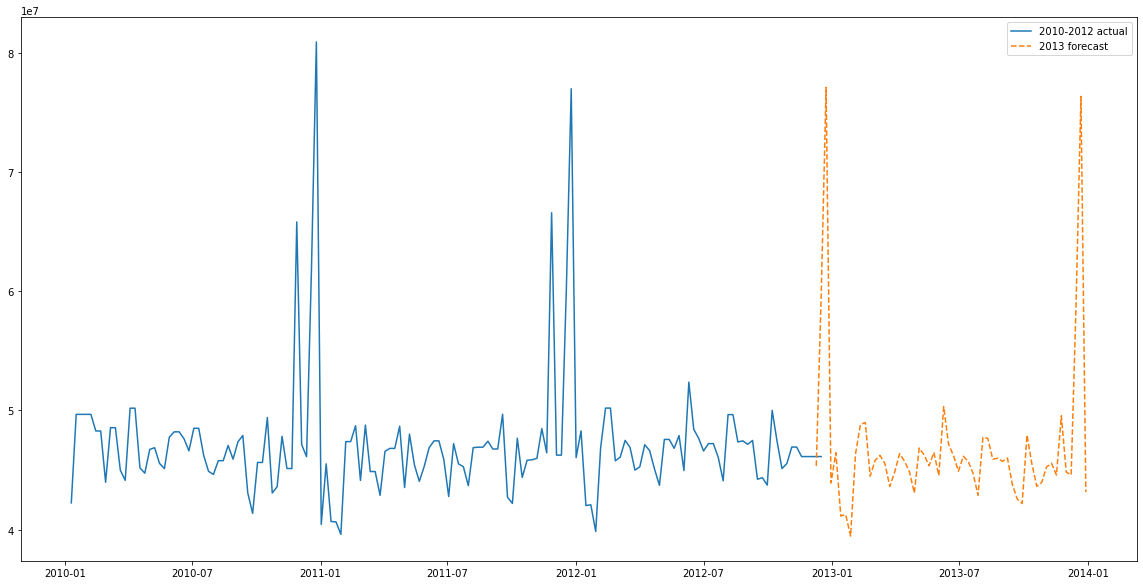

In [53]:
# Plotting the forecast 

plt.figure(figsize=(20, 10))
plt.plot(df_by_date_new.index, df_by_date_new.Weekly_Sales)
plt.plot(future_prediction, '--')
plt.legend(['2010-2012 actual', '2013 forecast'])